In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/MIROC5/pr_Amon_MIROC5_historical_r1i1p1_185001-201212.nc')

data

<xarray.Dataset>
Dimensions:    (time: 1956, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2012-12-16 12:00:00
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    experiment_id:          historical
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    model_id:               MIROC5
    forcing:                GHG, SA, Oz, LU, Sl, Vl, SS, Ds, BC, MD, OC (GHG ...
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6

In [3]:
#changing time dim to datetime64[ns] dtype

datetimeindex = data.indexes['time'].to_datetimeindex()
data['time']=datetimeindex
data


/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_19667/3137857967.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:    (time: 1956, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2012-12-16T12:00:00
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 2013-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -88.28 -88.28 ... 88.28 88.28 90.0
    lon_bnds   (lon, bnds) float64 -0.7031 0.7031 0.7031 ... 357.9 357.9 359.3
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    experiment_id:          historical
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    model_id:               MIROC5
    forcing:                GHG, SA, Oz, LU, Sl, Vl, SS, Ds, BC, MD, OC (GHG ...
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6

In [4]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1980-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 311, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2005-11-16
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-01-01 00:00:00 ... 2005-12-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -88.28 -88.28 ... 88.28 88.28 90.0
    lon_bnds   (lon, bnds) float64 -0.7031 0.7031 0.7031 ... 357.9 357.9 359.3
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    experiment_id:          historical
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    model_id:               MIROC5
    forcing:                GHG, SA, Oz, LU, Sl, Vl, SS, Ds, BC, MD, OC (GHG ...
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6

In [5]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 104, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) datetime64[ns] 1980-06-16 ... 2005-09-16
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-06-01 00:00:00 ... 2005-10-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -88.28 -88.28 ... 88.28 88.28 90.0
    lon_bnds   (lon, bnds) float64 -0.7031 0.7031 0.7031 ... 357.9 357.9 359.3
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    experiment_id:          historical
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    model_id:               MIROC5
    forcing:                GHG, SA, Oz, LU, Sl, Vl, SS, Ds, BC, MD, OC (GHG ...
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6

In [6]:
#data["pr"]["x"][379:429].values
#data["pr"]["y"][237:337].values
#data["pr"]["time"].values
#jjas_data["pr"]["lat"][:].values

#jjas_data["pr"]["lon"][:].values


#data["pr"]["x"].values

#data.x

In [7]:
#data["pr"]["y"][287:337].values

In [8]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(4125000.,5350000.),y=slice(2975000.,4200000.))
#jjas_data

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean 

<xarray.DataArray 'pr' (lat: 128, lon: 256)>
array([[1.15539422e-06, 1.14948443e-06, 1.14279112e-06, ...,
        1.17554760e-06, 1.16925355e-06, 1.16207570e-06],
       [1.88219258e-06, 1.87360217e-06, 1.86568150e-06, ...,
        1.90439562e-06, 1.89695379e-06, 1.88982824e-06],
       [1.69459940e-06, 1.68878876e-06, 1.68348572e-06, ...,
        1.72177295e-06, 1.71116233e-06, 1.70190947e-06],
       ...,
       [9.72515591e-06, 9.75703824e-06, 9.76447063e-06, ...,
        9.63018738e-06, 9.66072184e-06, 9.68647782e-06],
       [1.00939706e-05, 1.00860261e-05, 1.00778725e-05, ...,
        1.00945072e-05, 1.01152555e-05, 1.01194801e-05],
       [8.14148552e-06, 8.14163468e-06, 8.14073974e-06, ...,
        8.11566315e-06, 8.12682447e-06, 8.13207043e-06]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6

The pr is given in kg m $^{-2}$  s $^{-1}$ so we have to convert it into mm/day.

The formula is 1 kgm$^{-2}$ s$^{-1}$  = 86400 mm/day. 

so we have to divide pr value by 86400

 

In [10]:
pr_mm = jjas_mean*86400
pr_mm

<xarray.DataArray 'pr' (lat: 128, lon: 256)>
array([[0.09982606, 0.09931546, 0.09873715, ..., 0.10156731, 0.10102351,
        0.10040334],
       [0.16262144, 0.16187923, 0.16119488, ..., 0.16453978, 0.16389681,
        0.16328116],
       [0.14641339, 0.14591135, 0.14545317, ..., 0.14876118, 0.14784443,
        0.14704498],
       ...,
       [0.84025347, 0.8430081 , 0.84365026, ..., 0.83204819, 0.83468637,
        0.83691168],
       [0.87211906, 0.87143266, 0.87072818, ..., 0.87216542, 0.87395807,
        0.87432308],
       [0.70342435, 0.70343724, 0.70335991, ..., 0.7011933 , 0.70215763,
        0.70261089]])
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6

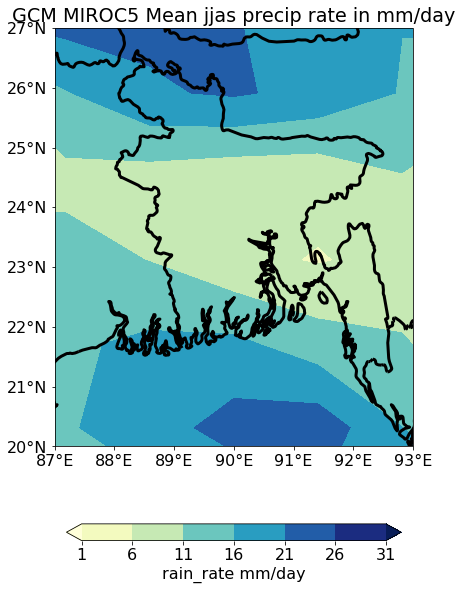

In [14]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature


plt.rcParams['font.size'] = '16'


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['lon'][:], pr_mm['lat'][:],pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 

plt.title('GCM MIROC5 Mean jjas precip rate in mm/day')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_gcm_miroc5_jjas_mean.png")




Now I will plot the annual precipitation rate in mm/day

In [12]:
annual_mean = data.pr.mean('time')
annual_mean

<xarray.DataArray 'pr' (lat: 128, lon: 256)>
array([[1.1444860e-06, 1.1404799e-06, 1.1358239e-06, ..., 1.1577439e-06,
        1.1530580e-06, 1.1488692e-06],
       [1.8707394e-06, 1.8676566e-06, 1.8655284e-06, ..., 1.8810017e-06,
        1.8778356e-06, 1.8747237e-06],
       [1.8706703e-06, 1.8666018e-06, 1.8626365e-06, ..., 1.8959269e-06,
        1.8853108e-06, 1.8769289e-06],
       ...,
       [6.6059324e-06, 6.6286198e-06, 6.6449170e-06, ..., 6.5361769e-06,
        6.5602417e-06, 6.5823792e-06],
       [6.3846446e-06, 6.3759048e-06, 6.3679936e-06, ..., 6.4032470e-06,
        6.4048236e-06, 6.4020901e-06],
       [4.8590969e-06, 4.8594607e-06, 4.8631000e-06, ..., 4.8563147e-06,
        4.8587808e-06, 4.8582074e-06]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6

In [13]:
#converting from kgm-2s-2 to mm/day

annual_pr_mm = annual_mean*86400
annual_pr_mm

<xarray.DataArray 'pr' (lat: 128, lon: 256)>
array([[0.09888359, 0.09853746, 0.09813519, ..., 0.10002907, 0.09962421,
        0.0992623 ],
       [0.16163189, 0.16136553, 0.16118165, ..., 0.16251855, 0.162245  ,
        0.16197613],
       [0.16162591, 0.16127439, 0.16093179, ..., 0.16380808, 0.16289085,
        0.16216665],
       ...,
       [0.57075256, 0.57271275, 0.57412083, ..., 0.56472568, 0.56680488,
        0.56871757],
       [0.5516333 , 0.55087818, 0.55019465, ..., 0.55324054, 0.55337676,
        0.55314058],
       [0.41982597, 0.4198574 , 0.42017184, ..., 0.41958559, 0.41979866,
        0.41974912]])
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6

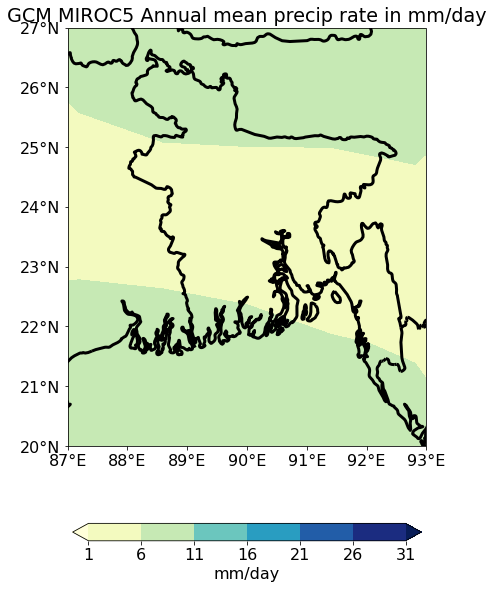

In [15]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12.5,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['lon'], annual_pr_mm['lat'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal', shrink=0.5,fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

#plt.title('GCM MIROC5 Annual mean precip rate in mm/day',fontweight="bold", fontsize=15)

plt.title('GCM MIROC5 Annual mean precip rate in mm/day')


plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_gcm_miroc5_annual_mean.png")




